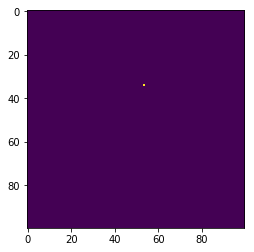

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [59]:
import numpy as np
import matplotlib.pyplot as plt

#grid world constants

WORLD_H = 100
WORLD_W = 100

NUM_BLUE = 4
NUM_RED = 4

def gen_map():
    grid_world = np.zeros([WORLD_W,WORLD_H], dtype=int)
    grid_world[34,53] = 100
    return grid_world
    
def plot_map(map_):
    return 
    
my_map = gen_map()
plt.imshow(my_map)
plt.show()
print(my_map)

In [43]:
# agent classes

class GroundVehicle(object):
    def __init__(self):
        self.x, self.y = 1, 2
        
    def report(self):
        print("position x:%d, y:%d" % (self.x,self.y))
        
# agent classes

class AerialVehicle(object):
    def __init__(self):
        self.x, self.y = 1, 2
        
    def report(self):
        print("position x:%d, y:%d" % (self.x,self.y))

In [34]:
ugv1 = GroundVehicle()
ugv1.report()

uav1 = AerialVehicle()
uav1.report()

position x:1, y:2
position x:1, y:2
